<a href="https://colab.research.google.com/github/williamfazle/Machine-Learning/blob/main/Random_Forest_Regression_for_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# --------------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# --------------------------------------------------------
# 2. Load Dataset
# --------------------------------------------------------
df = pd.read_csv('/content/diabetes_dataset.csv')   # <-- Update path if needed

print("Dataset Head:")
print(df.head())

Dataset Head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [6]:
# --------------------------------------------------------
# 3. Preprocessing
# --------------------------------------------------------

# Missing value check
print("\nMissing Values:\n", df.isnull().sum())

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [7]:
# --------------------------------------------------------
# 4. Train Random Forest Regressor
# --------------------------------------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MSE:", mse)
print("R² Score:", r2)


Model Performance:
MSE: 2982.641316573034
R² Score: 0.43704116866638887


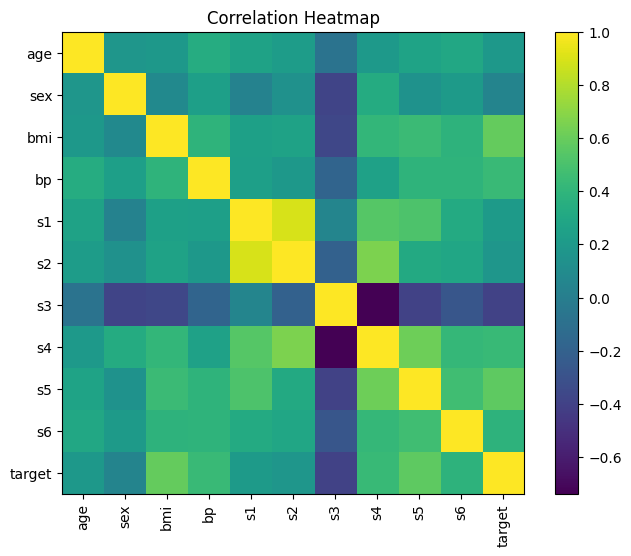

In [8]:
# --------------------------------------------------------
# 5. Visualization: Correlation Heatmap
# --------------------------------------------------------
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
plt.imshow(corr, interpolation='nearest', cmap='viridis')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

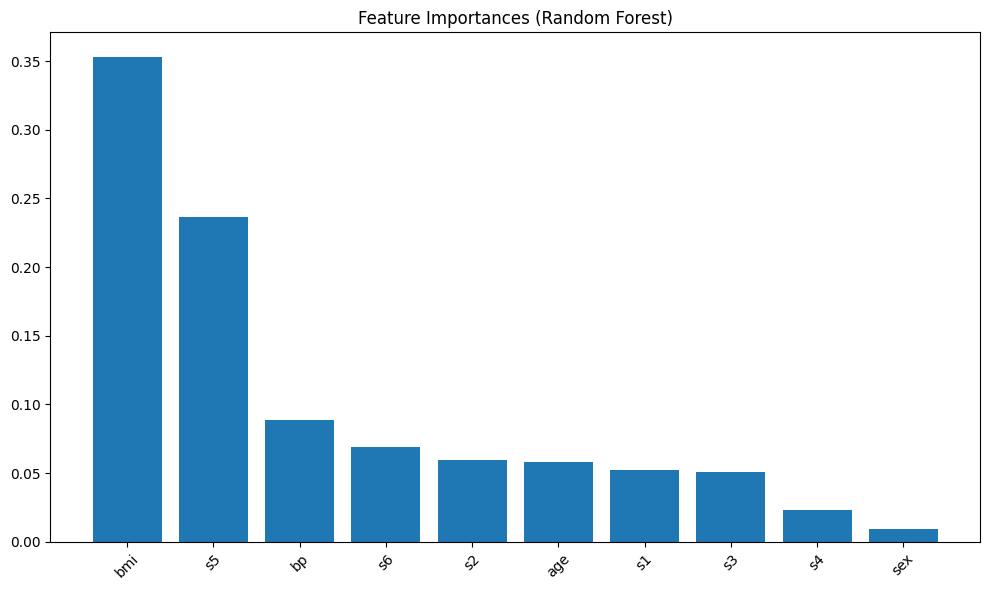

In [9]:
# --------------------------------------------------------
# 6. Visualization: Feature Importance
# --------------------------------------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

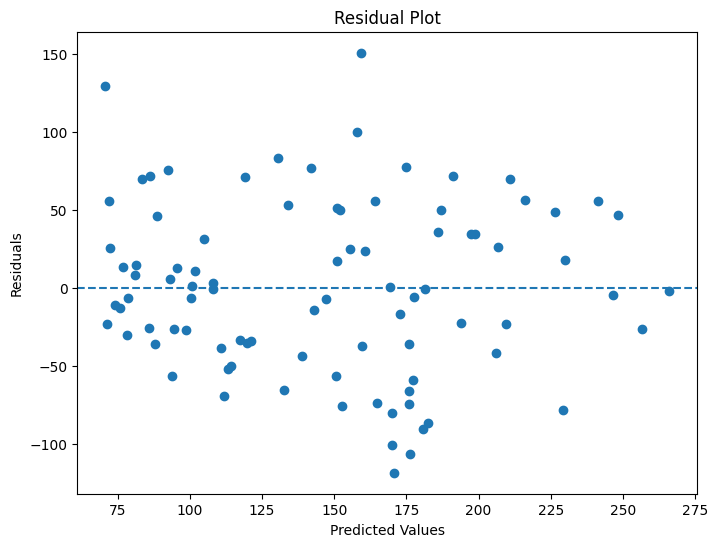

In [10]:
# --------------------------------------------------------
# 7. Visualization: Residual Plot
# --------------------------------------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

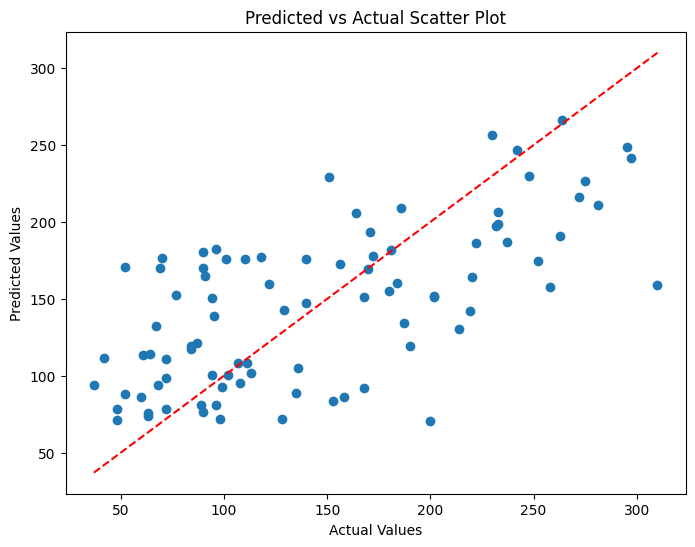

In [11]:
# --------------------------------------------------------
# 8. Visualization: Predicted vs Actual Scatter Plot
# --------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()